# Module 3 - Introduction to common seismological toolboxes

Different toolboxes aid in handling, processing and investigation of seismological data as, e.g.:
* *Obspy* ([docs.obspy.org](https://docs.obspy.org/))
* *Pyrocko* ([pyrocko.org](https://pyrocko.org/))
* *Integrated Seismic Program* ISP ([integratedseismicprogram.com](https://integratedseismicprogram.com/))
* *SeisComP* ([seiscomp.de](https://www.seiscomp.de/doc/index.html) - full version costs money)
* ...

All of them have their own strengths and weaknesses, so it is fully worth to check out each of them and also search for other tool boxes.

Here we will focus on *Pyrocko* and *Obspy* as two well known and often used free software packages. They are designed for usage in scripts. So we will do the same.

This module shows to load and process
* Station data (especially StationXML)
* Event data (QuakeML)
* Waveform data (miniSEED)

in *Pyrocko* and *Obspy*.

## 1. Installation of *Obspy*

For installation instructions it is always smart to check the instructions on the [website](https://docs.obspy.org/)

- [X] Translation Obspy <-> Pyrocko
2. Intro to (provided data)
    1. station data handling
        - [ ] StationXML
        - [ ] Pyrocko Station format
        - [ ] Pyrocko Response
        - [ ] Obspy Station format (?)
        - [ ] Obspy Response
    2. event data handling
        - [X] QuakeML
        - [ ] Pyrocko event format
        - [ ] Obspy event format
    3. waveform data handling
        - [X] MiniSEED (a lot more)
        - [X] Pyrocko - reading (trace snuffle)
        - [X] Pyrocko - squirrel (squirrel snuffle)
        - [X] Obspy stream (obspy plot)


## 2. Waveform data handling

A common waveform format used in seismology is `miniSEED` ([iris](https://ds.iris.edu/ds/nodes/dmc/data/formats/miniseed/)). It is optimized for seismic data and ships not only the data, but also certain channel meta data. This part explains, how miniSEED data is loaded and inspected.


Note: There are much more common and uncommon data formats (check e.g. [here for a more complete view on the zoo of seismic waveform formats](https://pyrocko.org/docs/current/_modules/pyrocko/io.html#load)). We will focus on miniSEED though as the most common one.


### *Obspy*

Let's load a waveform file with *Obspy* (follows the [tutorial](https://docs.obspy.org/tutorial/code_snippets/reading_seismograms.html#accessing-waveform-data)) 

In [15]:
# Let's start with obspy
from obspy import read

# This is an obspy stream
st = read('data/data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed')

The loaded stream contains the loaded waveform as traces. Meta data can be seen with different techniques:

In [16]:
# The stream stats
print(st)

# Let's check, how many traces are loaded
print('{} traces have been loaded into the stream'.format(len(st)))

1 Trace(s) in Stream:
GE.KTHA..HHZ | 2020-10-30T11:30:26.980000Z - 2020-10-30T12:30:26.970000Z | 100.0 Hz, 360000 samples
1 traces have been loaded into the stream


In [17]:
# Accessing an individual trace (here the first) of the stream
tr = st[0]

# Print the trace stats
print(tr.stats)

         network: GE
         station: KTHA
        location: 
         channel: HHZ
       starttime: 2020-10-30T11:30:26.980000Z
         endtime: 2020-10-30T12:30:26.970000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 360000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 118, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 483328})


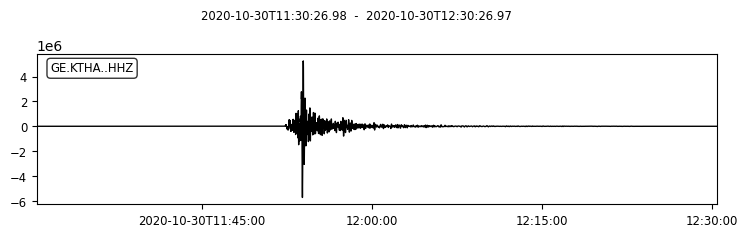

In [18]:
# Plot of the loaded data
st.plot();

### *Pyrocko*

*Pyrocko* ships different techniques to load and to display data from simple waveform file reading to a scan of directories using `pile` and `squirrel`.

In [19]:
# Let's start with pyrocko
from pyrocko.io import load
from pyrocko.pile import make_pile
from pyrocko.squirrel import Squirrel

# This is a list of traces
traces = load(filename='data/data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed')

# OR This generates a pile
p = make_pile('data/data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed')

# OR this generates a squirrel
sq = Squirrel()
sq.add('data/data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed')

selecting files... done. 1 file selected.
Looking at files [----------------------------------------] 100% Time:  0:00:00
Scanning files [------------------------------------------] 100% Time:  0:00:00
D◷ Gathering file names    working           MD◷ Preparing database      working           MD◷ Indexing files          working           MD◷ Aggregating selection   working           M

`traces` contains the loaded waveform as a list of individual traces. Meta data can be seen here using:

In [20]:
# Let's check, how many traces are loaded
print('{} trace has been loaded into the traces list'.format(len(traces)))  # Trace list
print('{} trace has been loaded into the pile'.format(len(p.all())))  # Pile
print('{} trace has been loaded into the squirrel'.format(len(sq.get_waveforms())))  # Squirrel

# Accessing an individual trace (here the first) from the trace list
tr = traces[0]
print(tr)

# OR accessing an individual trace (here the first) from the pile
tr = p.all()[0]
print(tr)

# OR accessing an individual trace (here the first) from the squirrel
tr = sq.get_waveforms()[0]
print(tr)

1 trace has been loaded into the traces list
1 trace has been loaded into the pile
1 trace has been loaded into the squirrel
Trace (GE, KTHA, , HHZ)
  timerange: 2020-10-30 11:30:26.98 - 2020-10-30 12:30:26.97
  delta t: 0.01
  last: True
  offset_end: 0
  offset_start: 0
  segment_size: 0

Trace (GE, KTHA, , HHZ)
  timerange: 2020-10-30 11:30:26.98 - 2020-10-30 12:30:26.96
  delta t: 0.01
  last: True
  offset_end: 0
  offset_start: 0
  segment_size: 0

Trace (GE, KTHA, , HHZ)
  timerange: 2020-10-30 11:30:26.98 - 2020-10-30 12:30:26.97
  delta t: 0.01
  last: True
  offset_end: 0
  offset_start: 0
  segment_size: 1048576



In [21]:
# Plot of the loaded data using the trace list
from pyrocko.trace import snuffle

snuffle(traces);

# OR plot of the loaded data using the pile
p.snuffle();

# OR plot of the loaded data using the squirrel
sq.snuffle();

cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--
cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--
cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--


## 3. Station meta data handling



In [ ]:
read_inventory
stationxml.load_xml

## 4. Event data handling

Earthquakes are often referred to as `events`. Event data as location, depth, time and mechanism (the style of faulting) is published for large earthquakes e.g. by [USGS](https://earthquake.usgs.gov/earthquakes/search/), [Global CMT](https://www.globalcmt.org/CMTsearch.html) or [GEOFON](https://geofon.gfz-potsdam.de/eqinfo/list.php). The most common data format for event information is QuakeML. Here we present, how QuakeML is loaded in *Obspy* and *Pyrocko*.

In [ ]:
catalog
event

## 5. Compatibility - *Obspy* and *Pyrocko* talk with each other

From time to time you might be faced with the problem of converting an *Obspy* stream into *Pyrocko* traces to watch it in snuffler etc.. To do so easily, *Pyrocko* contains a compatibility module [`obspy_compat`](https://pyrocko.org/docs/current/library/reference/obspy_compat.html):

In [23]:
# Import of the compatibility module
from pyrocko import obspy_compat

# Start compatiblity mode
obspy_compat.plant()

# Now snuffle the obspy stream 
st.snuffle();

# Or convert it to pyrocko traces:
traces_converted = st.to_pyrocko_traces()

cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--
